# From R to Python in 40 commands: a fieldguide for biologists

This is addressed to biologists who are looking to make their first steps in Python and would like to know how their knowledge of R commands translates into Python.
I was in this position not long ago and remember well the frustration of having to repeatedly look up how to execute even the most basic R operations in Python.
I have now mapped my R vocabulary onto Python.
This repository is effectively the resource that I would like to pass onto my past self.

I should mention that this notebook takes a particularly minimalistic stance on coding.
It is not intended to teach you the most pythonic way to code in Python.
It is geared towards a bare bones style of coding by focussing on the most basic functions.
As such, this notebook does not cover advanced dataframe and plotting operations, nor does it cover how to perform the satistical modelling that we love R for.

However, if you follow the steps provided in this notebook, you should acquire a highly functional knowledge of Python.
This will be a particulary suitable base from which to build up on and explore modelling, optimisation, and machine learning in Python.

Also, why not use ChatGPT? 
Why do we need yet another Python tutorial in the era of LLMs? 
First, I will say that LLMs do a perfect job at translating code from one language to another. 
However, without a good understanding of the target language, we are incapable to alter the output, and therefore remain dependent on LLMs for completing our projects, which I think is obviously not desirable.

---
# Setup

First things first, let us set up the notebook to run in Google Colab so that you can follow along interactively. To setup the repository in Google Colab:
* (1) Open Google Colab (`https://colab.research.google.com/`).
* (2) Sign into your Google account.
* (3) Select File > Open notebook > GitHub and enter the URL of the repository (`https://github.com/WillemBonnaffe/teaching`).
* (4) Open the notebook `i1-from-r-to-python.ipynb`.
* (5) To use GPU acceleration switch to a GPU runtime by selecting Runtime > Change runtime type > T4 GPU (you may have to click the `Connect` button in the top right corner).
* (6) Follow the instructions in the notebook.

In [ ]:
############################
## SETUP FOR GOOGLE COLAB ##
############################

## Note: Only run this section if running code in Google Colab

## Clone GitHub repository
!git clone https://github.com/WillemBonnaffe/teaching
%cd teaching

## Download necessary dependencies
!pip install torchdiffeq # for example

#
###

Alternatively, you can also setup a local copy of the repository by navigating to a suitable work directory and downloading the repository.
This assumes that you have successfully installed Python on your machine.

---
# 1. Libraries

```R
library(ode) # in R
library(lme4)
```

In [7]:
## Imports
import numpy as np # Numerical operations 
import matplotlib.pyplot as plt # Suite of plotting functions

Importing libraries in python is very similar to R except that you get the opportunity to rename that library.
This is what happens here with the syntax `as plt`, which allows you to refer to the library by the shorter prefix `plt` instead of `matplotlib.pyplot`.
This is because in Python everything is an object, including libraries. 
Contrary to R, objects within libraries have to be explicitly prefixed with the name of the library they belong to, e.g. `np.max()` or `plt.plot()` instead of `max()` and `plot()` in R. 
Note that you do not need to rename the libraries, e.g. `import numpy` would work fine, but then objects have to be called using the prefix `numpy`, i.e. `numpy.max()`.

---
# 2. Syntax 

One of the main differences between R and Python is that Python was designed to be compact with a minimal syntax. 
Python uses indentation to represent the nesting of operations in the code instead of brackets, contrary to languages like R and C.
In general, Python does not like brackets.
Note however that if you are nostalgic of R, you can still use brackets for conditions in `if` and `while` statements.
Also following from Python's minimalistic ethos, the directional assignment, `<-`, in R is compressed into a single `=`.

# If and else

```R
## In R
test <- T
if (test == T){x
    print("Test is true")
} else {
    print("Test is not true")
}
```

In [2]:
## In Python
test = False
if test == True:
    print("Test is true")
else:
    print("Test is not true")

Test is not true


Note how the brackets surrounding the condition in the `if` statement have gone, along with the both curly brackets, `{}`, which have been replaced by a single `:`.

# While

```R
## In R
x <- 0
while (x < 10){
    x <- x + 1
} 
```

In [4]:
## In Python
x = 0
while x < 10:
    x = x + 1

# For

```R
## In R
x <- 0
for (i in 1:10){
    x <- x + 1
}
```

In [5]:
## In Python
x = 0
for i in range(10):
    x = x + 1
print(x)

10


Here we have another example of a confusing object in python with the command `range(10)`. 
This functions equivalently to the command `1:10` in R, to the difference that the indexing starts at 0 instead of 1 and stops before 10.

---

# 3. Objects

The `numeric`, i.e. vectors, and `matrix` objects in R are both mapped to `numpy arrays`.
Thankfully, the `list` object in R is also the `list` object in Python.
It should be noted that `numpy arrays` can be seen as multi-dimensional matrices.
This in itself can be a motivation for using Python over R, due to the of simplicity of manipulating both one-dimensional vectors and high-dimensional matrices with the same object type.


## Create a vector

```R
## In R
x = c(1,2,3,4)
```

In [8]:
## In Python
x = np.array([1,2,3,4])
print(x)

[1 2 3 4]


## Create a matrix

```R
## In R
x <- matrix(c(1,2,3,4), ncol=2, nrow=2)
```

In [13]:
## In Python
x = np.array([[1,2], [3,4]])
print(x)

[[1 2]
 [3 4]]


In [10]:
## or more analogously
x = np.array([1,2,3,4]).reshape(2,2)
print(x)

[[1 2]
 [3 4]]


This last command maps more directly onto the R command.
It reads from left to right: first create a row vector, and second reshape it into a two-dimensional array with two rows and two columns.
This is also a good opportunity to point out another difference between R and Python, in that Python enables chaining commands, e.g. `x = np.array([1,2,3,4]).reshape(2,2).max()`.
More on this will follow.

## Create a list

```R
## In R
r <- list(1,2,3,4)
```

In [15]:
## In Python
x = [1,2,3,4]
print(x)

[1, 2, 3, 4]


## Check the type of objects

In [16]:
## In Python
x = [1,2,3,4]
print(type(x))

<class 'list'>


## Create a list iteratively

```R
## In R
r <- list()
for (i in 1:10){
    r[i] <- i
}
```

In [10]:
## In Python
r = []
for i in range(10):
    r += [i] # or r = r + [i]
print(r)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Here we use another pythonic property, the in-place assignment `r += [i]`, which is a shorthand for `r = r + [i]`.
Again, we are trying to save space and increase confusion.
It comes with its own quirks which are covered in the bonus section.

## Create a matrix iteratively

```R
## In R
r <- NULL
for (i in 1:3){
    r <- rbind(r, c(1,2,3))
}
```


In [18]:
## In Python
r = []
for i in range(3):
    r += [np.array([1,2,3])]
r = np.stack(r)
print(r)

[[1 2 3]
 [1 2 3]
 [1 2 3]]


We have to take a slightly different route here, as Python does not have the same tolerance as R for building objects from NULL.
We thus create an empty list `[]` and append arrays iteratively to it.
In a final step we convert that list into an array using the method `np.stack()` that works extactly as the name indicates.
Note that it is also also possible to create an array with a single row and then build the final array by iteratively appending arrays.
This is left as an exercise.

## Sequence

```r
## In R
seq(1, 10, by = 2)
seq(0, 1, length.out = 5)
```

In [19]:
## In Python
print(np.arange(1, 11, 2))
print(np.linspace(0, 1, 5))

[1 3 5 7 9]
[0.   0.25 0.5  0.75 1.  ]


## Create vector from a list

```R
## In R
a_list <- list(1,2,3,4)
as.numeric(a_list)
```

In [22]:
## In Python
x_list = [1,2,3,4]
r = np.array(x_list)
print(r)

[1 2 3 4]


## Create matrix from vector

```R
## In R
x <- c(1,2,3,4)
r <- matrix(, ncol=2, nrow=2)
```

In [24]:
## In Python
x = np.array([1,2,3,4])
r = x.reshape(2,2)
print(r)

[[1 2]
 [3 4]]


## Create empty arrays

```R
## In R
array(0, dim = c(2, 3, 4))
```

In [34]:
## In Python
print(np.zeros((2,3,4)))
# or print(np.ones((2,3,4)))

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


This can be useful to build empty arrays that can be populated later on.
It takes the dimension of the array as a tuple, `(2, 3, 4)`.

---
# 3. Indexing

The indexing of objects in Python starts at 0, e.g. `i = {0, 1, ...}`, instead of `i = {1, 2, ...}`.
This is probably the most well-known difference between Python and other languages like R. 
If R is your main language, you will inevitably forget this rule and get the indexing wrong at some point.

## Check the length of vectors

```R
## In R
x <- c(1,2,3,4) 
length(x)
```

In [25]:
## In Python
x = np.array([1,2,3,4])
len(x)

4

## Check the dimensions of matrices

```R
## In R
x <- c(1,2,3,4)
x <- rbind(x,x)
dim(x)
```

In [27]:
## In Python
x = np.array([[1,2,3,4],[1,2,3,4]])
print(x.shape)

(2, 4)


This is a universal way to check the dimensions of arrays in tensors in Python. 
It also works for checking the length of vectors, i.e. unidimensional arrays.

## Check the length of lists

```R
## In R
x <- list(1,2,3,4)
length(x)
```

In [28]:
## In Python
x = [1,2,3,4]
len(x)

4

Note that lists do not have `.shape` method.

## Indexing lists

```R
## In R
x = list(1,2,3,4)
print(x[1])
```

In [29]:
## In Python
x = [1,2,3,4]
print(x[0])

1


## Indexing vectors

```R
## In R
x = c(1,2,3,4)
print(x[1])
```

In [30]:
## In Python
x = np.array([1,2,3,4])
print(x[0])

1


## Indexing matrices

```R
## In R
x <- rbind(c(1,2),c(3,4))
print(x[1,])
```

In [31]:
## In Python
x = np.array([[1,2],[3,4]])
print(x[0,:])

[1 2]


Here the main difference with R is that we have to explicitly indicate that we want all elements in the row or column slot with the symbol `:`.
Note that the exact same applies to higher dimensional arrays, e.g. `x[0,:,:]` if `x` has three dimensions.

## Indexing multiple elements of a matrix

```R
## In R
x <- rbind(c(1,2),c(3,4),c(5,6))
print(x[c(1,3),])
```

In [35]:
## In Python
x = np.array([[1,2],[3,4],[5,6]])
print(x[[0,2],:])

[[1 2]
 [5 6]]


## Accessing last element

```r
# In R
x <- c(1, 2, 3, 4)
x[length(x)]

In [36]:
## In Python
x = [1, 2, 3, 4]
x[-1]

4

This is a false friend as writing `x[-1]` in R would remove the first element.

## Which

```R
## In R
x <- c(1,2,3,4)
which(x == 1)
```

In [37]:
## In Python
x = np.array([1,2,1,4])
r = np.where(x == 1)[0]
print(r)

[0 2]


Here we need to add the index `[0]` because by default the function `np.where()` returns a tuple (i.e. a collection) of indices.
This is because it is designed to work on multi-dimensional arrays.
So if you want to apply `np.where()` to an array with more than one dimension, ignore the `[0]`.

---
# 4. Basic operations

## Concatenate

```R
## In R
u <- c(1,2)
v <- c(3,4)
r <- c(u,v) 
```

In [42]:
## In Python
u = np.array([1,2])
v = np.array([3,4])
r = np.concatenate((u,v), axis=0)
print(r)

[1 2 3 4]


This is a bit more cumbersome. 
The argument `axis=0` indicates that the arrays should be concatenated along their first dimension, which is good as they have only one dimension in this case.

## Bind vectors by rows

```R
## In R
r <- rbind(u,v) 
```

In [43]:
## In Python
r = np.concatenate((u[None,:],v[None,:]), axis=0)
print(r)

[[1 2]
 [3 4]]


Here we have to introduce a python trick.
In order to concatenate two vectors by row, we have to create a second dimension.
This is the purpose of the syntax `u[None,:]`, which adds a dimension to the vectors, turning them into matrices with only one row, i.e. row vectors.


## Bind vectors by columns

```R
## In R
r <- cbind(u,v) 
```

In [45]:
## In Pyton
r = np.concatenate((u[:,None],v[:,None]), axis=1)
print(r)

[[1 3]
 [2 4]]


This reverse: the commands`u[:,None]` and `v[:,None]` create column vectors (i.e. matrices with a single column) from the initial vectors.
Those are then concatenated along the second dimension using `axis=1` (i.e. columns for two dimensional arrays).

## Bind matrices by rows

```R
## In R
u <- rbind(c(1,2),c(3,4))
v <- rbind(c(5,6),c(7,8))
r <- rbind(u,v) 
```

In [55]:
## In Python
u = np.array([[1,2],[3,4]])
v = np.array([[5,6],[7,8]])
r = np.concatenate((u,v), axis=0)
print(r)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


## Bind matrices by columns

```R
## In R
r <- cbind(u,v)
```

In [53]:
## In Python
r = np.concatenate((u,v), axis=1)
print(r)

[[1 2 5 6]
 [3 4 7 8]]


## Reshape array

# WORK IN PROGRESS HERE

In [58]:
## Reshape array
u = np.array([[1,2],[3,4]])
v = np.array([[5,6],[7,8]])
r = np.concatenate((u,v), axis=0)
print(r.reshape(1,r.shape[0] * r.shape[1])) # Row vector
print(r.reshape(r.shape[0] * r.shape[1],1)) # Column vector

[[1 2 3 4 5 6 7 8]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]


## Flatten

```R
x <- matrix(1:6, nrow = 2)
as.vector(x)
matrix(as.vector(x), ncol = 1)
```

In [29]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])
x = x.flatten() 
print(x) # row vector

[1 2 3 4 5 6]


In [30]:
# or
x = np.array([[1, 2, 3],
              [4, 5, 6]])
x = x.reshape(x.shape[0] * x.shape[1], 1) # column vector
print(x)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


## Match

```R
x <- c("a", "b", "c") # in R
y <- c("c", "a")
match(y, x)
```

In [31]:
x = np.array(["a", "b", "c"])
y = np.array(["c", "a"])
r = [np.where(x == val)[0][0] for val in y]
print(r)

[np.int64(2), np.int64(0)]


## Unique

```R
x <- c(1,1,2,3,4,4) # in R
r <- unique(x)
```

In [32]:
x = np.array([1,1,2,3,4,4])
r = np.unique(x)
print(r)

[1 2 3 4]


## Sort

```R
x <- c(4,3,2,1) # in R
r <- sort(x)
```

In [33]:
x = np.array([4,3,2,1])
r = np.sort(x)
print(r)

[1 2 3 4]


In [34]:
r = np.argsort(x)
print(r)

[3 2 1 0]


## Order

```r
x <- c(3, 1, 4, 2) # in R
order(x)
x[order(x)]

In [35]:
x = np.array([3, 1, 4, 2])
r = x[np.argsort(x)]
print(r)

[1 2 3 4]


## Reverse vector or list

```r
x <- c(1, 2, 3, 4) # in R
rev(x)

In [36]:
x = np.array([1, 2, 3, 4])
np.flip(x)

array([4, 3, 2, 1])

## Repeat elements

```r
x <- c(1, 2, 3) # in R
rep(x, times = 2)
rep(x, each = 2)

In [37]:
x = np.array([1, 2, 3])
r = np.tile(x, 2)
print(r)
r = np.repeat(x, 2)
print(r)

[1 2 3 1 2 3]
[1 1 2 2 3 3]


## Apply

```R
x <- matrix(1:6, nrow = 2) # in R
apply(x, 1, sum)
apply(x, 2, mean)
apply(x, 2, sd)
```

In [38]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])
print(x.sum(axis=1))
print(x.mean(axis=0))
print(x.std(axis=0))

[ 6 15]
[2.5 3.5 4.5]
[1.5 1.5 1.5]


## Matrix multiplication

```R
r <- u %*% v # in R
```

In [39]:
u = np.array([[1,2],[3,4]])
v = np.array([[0.5],[2]])
r = np.matmul(u, v)
print(r)

[[4.5]
 [9.5]]


---
# 5. Functions

```R
y <- function(x, a, b, c){ # in R
    r <- a + b * x + c * x^2
    return(r)
}
```

In [41]:
def y(x, a, b, c):
    res = a + b * x + c * x**2
    return res

## Example
x = np.arange(-1,1,0.25)
print(x)
print(y(x, a=0.0, b=1.0, c=-0.5)[4])

[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]
0.0


---
# 6. Dataframes

Reading and writing dataframes using pandas.

## Read table

```R
df <- read.table("data_hare_lynx.csv", sep=",", header=T)
print(dim(df))
# [1] 92  3
```

In [42]:
import pandas as pd
df = pd.read_csv("data_hare_lynx.csv", delimiter=",")
print(df.shape)

(91, 3)


## Access columns and rows

```R
print(df[,"Hare"]) # in R
print(df[1:5,])
```

In [43]:
print(df["Hare"])
print(df.iloc[1:5,:])

0     19.58
1     19.60
2     19.61
3     11.99
4     28.04
      ...  
86    19.52
87    82.11
88    89.76
89    81.66
90    15.76
Name: Hare, Length: 91, dtype: float64
   Year   Hare   Lynx
1  1846  19.60  45.15
2  1847  19.61  49.15
3  1848  11.99  39.52
4  1849  28.04  21.23


## Write table

```R
write.table(df, "data_hare_lynx_copy.csv", sep=",", quote=F, row.names=F, col.names=T)
```

In [44]:
df.to_csv("data_hare_lynx_copy.csv", sep=",", index=False, header=True)

---
# 7. Plotting

Plotting is another area where the minimalism of Python ends, and where biologists coming from R suffer the most.
This is a technical topic better covered in a dedicated tutorial, but I will still provide a minimal example that I like to use for my own plotting in Python.

## Minimum viable plot

```R
pdf("figure.pdf")
#
plot(df[,"Year"], df[,"Hare"], type="b", col="black", xlab="Time (yr)", ylab="Count", bty="l", pch=16)
lines(df[,"Year"], df[,"Lynx"], type="b", col="red", pch=16)
legend("topright", legend=c("Hare counts", "Lynx counts"), col=c("black", "salmon"), lty=1, bty="n")
#
dev.off()
```

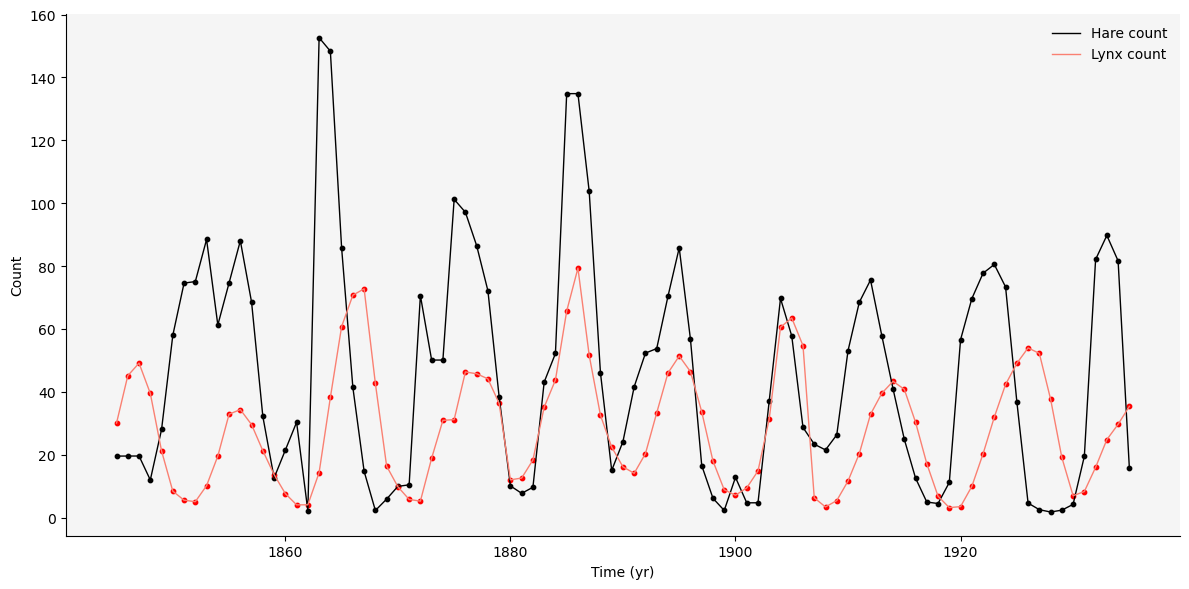

In [45]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))
plt.rcParams["figure.dpi"] = 300
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.facecolor"] = "whitesmoke"
#
plt.plot(df["Year"], df["Hare"], label="Hare count", color="black", lw=1)
plt.scatter(df["Year"], df["Hare"], color="black", s=10.0)
#
plt.plot(df["Year"], df["Lynx"], label="Lynx count", color="salmon", lw=1)
plt.scatter(df["Year"], df["Lynx"], color="red", s=10.0)
#
plt.xlabel("Time (yr)")
plt.ylabel("Count")
plt.legend(loc="upper right", frameon=False)
#
plt.tight_layout()
plt.show()
#
fig.savefig("figure.pdf")
plt.rcParams['figure.dpi'] = 100

---
# 8. Python dark magic

Very much like the snake, Python has its ways of catching you offguard with rather cryptic commands.
Comming from R myself, I have so far managed to ignore the vast majority of these commands, apart from a few notable ones which are listed below.

## Multiple assignment

In [46]:
a, b = [1,2]
print(a)
print(b)

1
2


## Multiple assignment in for loop

In [47]:
x = np.array([[1,2], [3,4], [5,6]])
for i, j in x:
    print(f"{i} and {j}")    

1 and 2
3 and 4
5 and 6


## Listloop

In [48]:
x = [i**2 for i in range(4)]
print(x)

[0, 1, 4, 9]


This is also known as a list comprehension.
Contrary to what its name suggests, it is a confusingly pythonic, albeit compact, way to write a for loop in Python.

## In-place assignment

In [61]:
x = 0
x += 1
x *= 2
x /= 0.5
print(x)

4.0


## List but not least

In [62]:
a = [1, 2]
b = a
a += [3]
print(a)
print(b)

[1, 2, 3]
[1, 2, 3]


In [65]:
a = [1, 2]
b = a
a = b + [3]
print(a)
print(b)

[1, 2, 3]
[1, 2]


In [66]:
a = [1, 2]
b = a.copy()
a += [3]
print(a)
print(b)

[1, 2, 3]
[1, 2]


---
# Case Study

```R
################
## CASE STUDY ##
################

## Three stages
N_1 <- 10.0 
N_2 <- 0.0
N_3 <- 0.0

## State vector
Nt <- c(N_1, N_2, N_3)

## Parameters
t_max <- 100 # Max number of years

## Transition matrix
A <- matrix(c(0.8, 0.2, 0.0,
              0.0, 0.9, 0.1,
              0.3, 0.0, 0.7),
            nrow = 3, byrow = TRUE)

## Functions
f <- function(N, A) {
  as.numeric(matrix(N, nrow = 1) %*% A)
}

## Simulation
N_matrix <- NULL
for (t in seq_len(t_max)) {
  Nt <- f(Nt, A)
  N_matrix <- rbind(N_matrix, Nt)
}

## Visualise simulation
matplot(N_matrix, type = "l", xlab = "time", ylab = "N")
legend("topright", legend = paste0("stage", 1:3), lty = 1, col = 1:3)

#
###
```

[2.72727273 5.45454545 1.81818182]


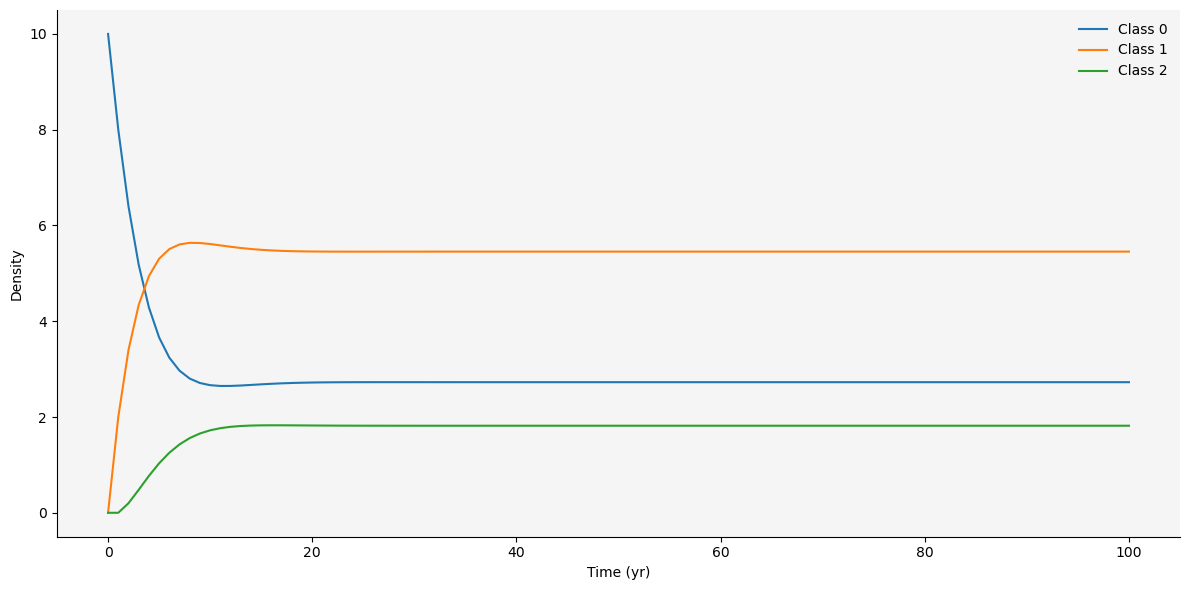

In [49]:
################
## CASE STUDY ##
################

## Three stages
N_1 = 10.0 
N_2 = 0.0
N_3 = 0.0

## State vector
Nt = np.array([N_1, N_2, N_3])

## Parameters
t_max = 100 # Max number of years

## Transition matrix
A = np.array([[0.8, 0.2, 0.0],
              [0.0, 0.9, 0.1],
              [0.3, 0.0, 0.7]])

## Functions
def f(N, A):
    return np.matmul(N, A)

## Simulation
N_list = [Nt]
for t in range(t_max):
    Nt = f(Nt, A)
    N_list += [Nt]

## Format to matrix
N_array = np.stack(N_list)
print(N_array[-1])

## Visualise simulation
fig = plt.figure(figsize=(12,6))
plt.rcParams["figure.dpi"] = 300
#
for i in range(Nt.shape[0]):
    plt.plot(np.arange(0,t_max+1), N_array[:,i], label=f"Class {i}")
#
plt.xlabel("Time (yr)")
plt.ylabel("Density")
plt.legend(loc="upper right", frameon=False)
#
plt.tight_layout()
plt.show()
#
plt.rcParams["figure.dpi"] = 100

#
###